Credits: Raschka et al., Chap 14

## Convolutional Neural Network - Part 1

In [165]:
from IPython.display import Image
from IPython.display import display
%matplotlib inline

**Outline**

- [The building blocks of CNNs](#The-building-blocks-of-CNNs)
  - [Understanding CNNs and feature hierarchies](#Understanding-CNNs-and-feature-hierarchies)
  - [Performing discrete convolutions](#Performing-discrete-convolutions)
    - [Discrete convolutions in one dimension](#Discrete-convolutions-in-one-dimension)
    - [Padding inputs to control the size of the output feature maps](#Padding-inputs-to-control-the-size-of-the-output-feature-maps)
    - [Determining the size of the convolution output](#Determining-the-size-of-the-convolution-output)
    - [Performing a discrete convolution in 2D](#Performing-a-discrete-convolution-in-2D)
  - [Subsampling layers](#Subsampling-layers)
- [Putting everything together -- implementing a CNN](#Putting-everything-together----implementing-a-CNN)
  - [Working with multiple input or color channels](#Working-with-multiple-input-or-color-channels)
  - [Regularizing an NN with L2 regularization and dropout](#Regularizing-an-NN-with-L2-regularization-and-dropout)
  - [Loss functions for classification](#Loss-functions-for-classification)
- [Implementing a deep CNN using PyTorch](#Implementing-a-deep-CNN-using-PyTorch)
  - [The multilayer CNN architecture](#The-multilayer-CNN-architecture)
  - [Loading and preprocessing the data](#Loading-and-preprocessing-the-data)
  - [Implementing a CNN using the torch.nn module](#Implementing-a-CNN-using-the-torch.nn-module)
    - [Configuring CNN layers in PyTorch](#Configuring-CNN-layers-in-PyTorch)
    - [Constructing a CNN in PyTorch](#Constructing-a-CNN-in-PyTorch)

###  The building blocks of convolutional neural networks


CNN inspired by the functioning of the visual cortex in our brain.
Experiment in 1959 with an anesthetized cat.
Neurons respond differentlt after projecting different patterns of light in front of the cat.
Primary layers of the viual cortex detects edges and straight lines, highger order layers focus more on extracting complex shapes.  

In CNN, early layers extract low-level features from the raw data, later layers (often fully connected as in MLP) use these features to predict a target value.

CNN typically perform well on image data.

In Fig. 1, you see how to create **feature maps** from an image.
The local patch of pixels is referred to as **local receptive field**.

In [164]:
# FIG 1
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig1_lec10.png", width=900))

CNN performs well on image-related tasks largely due to two ideas:

* **Sparse connectivity**: A single element in the feature map is connected to only a small patch of pixels. This is very different from MLP (connections to the whole image).

* **Parameter sharing**: : The same weights are used for different patches of the input image.

CNN made of following layers:

* convolutional -> have learnable parameters

* subsampling -> no learnable parameters

* fully connected -> have learnable parameters



### Performing discrete convolutions

**Discrete convolutions in one dimension**



https://en.wikipedia.org/wiki/Convolution

We want to achieve this through a **filter** (**w**) :

$$ y[i] = \sum_{k=-\infty}^{+\infty} x[i - k] w[k] $$


First thing we need to do is **padding**.


In [159]:


# FIG 2
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig2_lec10.png", width=600))

In [158]:
# FIG 3
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig3_lec10.png", width=600))

### Padding inputs to control the size of the output feature maps



In [157]:
# FIG 4
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig4_lec10.png", width=600))

### Determining the size of the convolution output

An important formula to remember is

$$ o = \left\lfloor \frac{n + 2p - m}{s} \right\rfloor + 1 $$

which gives the convolution output

In [ ]:
import torch
import numpy as np

print('PyTorch version:', torch.__version__)
print('NumPy version: ', np.__version__)

PyTorch version: 1.10.1+cu102
NumPy version:  1.22.0


In [166]:
import numpy as np

In [ ]:
w = [1, 0, 3, 1, 2]

In [ ]:
np.shape(w)

(5,)

In [ ]:
w[: :-1]

[2, 1, 3, 0, 1]

In [ ]:
w = np.zeros((4,5))

In [ ]:
np.shape(w)

(4, 5)

In [ ]:
w[2,3]=-17
w[1,2]=3.
w[3,1] =2.

In [ ]:
w

array([[  0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   3.,   0.,   0.],
       [  0.,   0.,   0., -17.,   0.],
       [  0.,   2.,   0.,   0.,   0.]])

In [ ]:
w[: : -2]

array([[0., 2., 0., 0., 0.],
       [0., 0., 3., 0., 0.]])

In [ ]:
w[: -2]

array([[0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0.]])

In [ ]:
w = [1, 0, 3, 1, 2]

In [ ]:
w[: : -1]

[2, 1, 3, 0, 1]

In [2]:
for i in range(0,10,2):
  print(i)

0
2
4
6
8


In [13]:
def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate(
            [zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, (int((len(x_padded) - len(w_rot))/s) + 1), s):
        res.append(np.sum(
            x_padded[i:i + w_rot.shape[0]] * w_rot))
    return np.array(res)


## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print(np.array(w[::-1]))
print(np.shape(np.array(w[::-1])))
print(np.array(w[::-1]).shape[0])

print('Conv1d Implementation:',
      conv1d(x, w, p=2, s=1))

print('Numpy Results:',
      np.convolve(x, w, mode='same'))

[2 1 3 0 1]
(5,)
5
Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]
Numpy Results: [ 5 14 16 26 24 34 19 22]


In [19]:
w = np.zeros((3,3))
w[1,2]=-1.
w[0,1]=3.
w[2,1]=2.
print(w)

[[ 0.  3.  0.]
 [ 0.  0. -1.]
 [ 0.  2.  0.]]


In [21]:
w[::-1, ::-1]

array([[ 0.,  2.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  3.,  0.]])

### Performing a discrete convolution in 2D




In [156]:
# FIG 5
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig5_lec10.png", width=600))

Suppose you want to do this convolution


In [167]:
# conv 2d
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/conv2d_lec10.png", width=600))

In [155]:
# FIG 6
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig6_lec10.png", width=600))

In [34]:
import scipy.signal


def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0],
    p[1]:p[1]+X_orig.shape[1]] = X_orig

    print(W_rot)

    res = []
    for i in range(0, (int((X_padded.shape[0] -
                            W_rot.shape[0]) / s[0]) + 1)* s[0], s[0]):
        res.append([])
        for j in range(0, (int((X_padded.shape[1] -
                                W_rot.shape[1]) / s[1]) + 1)* s[1], s[1]):
            X_sub = X_padded[i:i + W_rot.shape[0],
                    j:j + W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

print('Conv2d Implementation:\n',
    conv2d(X, W, p=(1, 1), s=(1, 1)))


print('SciPy Results:\n',
    scipy.signal.convolve2d(X, W, mode='same'))


[[1 1 0]
 [1 2 1]
 [3 0 1]]
Conv2d Implementation:
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


### Subsampling layers

In [154]:
# FIG 7
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig7_lec10.png", width=600))

### Putting everything together – implementing a CNN

**Working with multiple input or color channels**



In [153]:
# FIG 8
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig8_lec10.png", width=600))

**TIP: Reading an image file**

In [34]:
import torch
from torchvision.io import read_image
import requests
from io import BytesIO
import tempfile

# Direct image URL
url = "http://www.originlab.com/www/products/images/ChannelSplit_Merge.png"

# Fetch the image from the web
response = requests.get(url, allow_redirects=True)

# Get the content type of the image (e.g., 'image/png', 'image/jpeg')
content_type = response.headers['Content-Type']

# Determine the correct file extension based on the content type
if 'image/jpeg' in content_type:
    file_extension = ".jpg"
elif 'image/png' in content_type:
    file_extension = ".png"
elif 'image/gif' in content_type:
    file_extension = ".gif"
else:
    raise ValueError(f"Unsupported image type: {content_type}")

# Check if the response contains an image
if 'image' in content_type:
    img_bytes = BytesIO(response.content)  # Store the image in a BytesIO object

    # Create a temporary file with the correct extension to save the image
    with tempfile.NamedTemporaryFile(suffix=file_extension) as tmp:
        tmp.write(img_bytes.getvalue())  # Write the image data to the temp file
        tmp.flush()  # Ensure the data is written to disk

        # Use torchvision's read_image to read the image from the temporary file
        img = read_image(tmp.name)  # tmp.name gives the file path

    # Check image properties
    print('Image shape:', img.shape)  # Tensor shape: [Channels, Height, Width]
    print('Number of channels:', img.shape[0])
    print('Image data type:', img.dtype)

    # Select a sub-block of the image
    print(img[:, 100:102, 100:102])

else:
    print(f"Failed to download image. Content-Type is {response.headers['Content-Type']}")


Image shape: torch.Size([3, 537, 547])
Number of channels: 3
Image data type: torch.uint8
tensor([[[255, 255],
         [255, 255]],

        [[255, 255],
         [255, 255]],

        [[255, 255],
         [255, 255]]], dtype=torch.uint8)


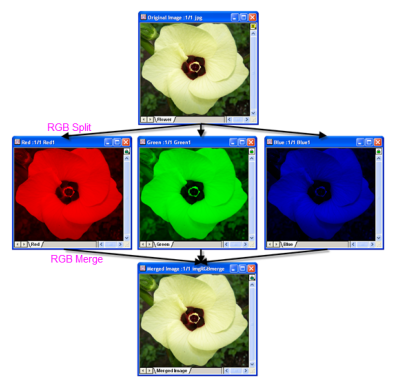

In [36]:
import matplotlib.pyplot as plt

# Convert the tensor to a NumPy array for display
img_np = img.permute(1, 2, 0).numpy()  # Change the order from [C, H, W] to [H, W, C]

# Display the image using Matplotlib
plt.imshow(img_np)
plt.axis('off')  # Turn off the axis labels
plt.show()

### Regularizing a neural network with L2 regularization and dropout



In [152]:
# FIG 9
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig9_lec10.png", width=600))

In [37]:
import torch.nn as nn
loss_func = nn.BCELoss()
loss = loss_func(torch.tensor([0.9]), torch.tensor([1.0]))
l2_lambda = 0.001

conv_layer = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5)
l2_penalty_conv = l2_lambda * sum([(p**2).sum() for p in conv_layer.parameters()])
#loss_with_penalty = loss + l2_penalty

linear_layer = nn.Linear(10, 16)
l2_penalty_linear = l2_lambda * sum([(p**2).sum() for p in linear_layer.parameters()])
#loss_with_penalty = loss + l2_penalty
total_loss_with_penalty = loss + l2_penalty_conv + l2_penalty_linear
print(total_loss_with_penalty)

tensor(0.1127, grad_fn=<AddBackward0>)


In [ ]:
####### Binary Cross-entropy
logits = torch.tensor([0.8])
probas = torch.sigmoid(logits)
target = torch.tensor([1.0])

bce_loss_fn = nn.BCELoss()
bce_logits_loss_fn = nn.BCEWithLogitsLoss()

print(f'BCE (w Probas): {bce_loss_fn(probas, target):.4f}')
print(f'BCE (w Logits): {bce_logits_loss_fn(logits, target):.4f}')


####### Categorical Cross-entropy
logits = torch.tensor([[1.5, 0.8, 2.1]])
probas = torch.softmax(logits, dim=1)
target = torch.tensor([2])

cce_loss_fn = nn.NLLLoss()
cce_logits_loss_fn = nn.CrossEntropyLoss()

print(f'CCE (w Logits): {cce_logits_loss_fn(logits, target):.4f}')
print(f'CCE (w Probas): {cce_loss_fn(torch.log(probas), target):.4f}')

BCE (w Probas): 0.3711
BCE (w Logits): 0.3711
CCE (w Logits): 0.5996
CCE (w Probas): 0.5996


### The multilayer CNN architecture with PyTorch

In [150]:
# FIG 10
display(Image(url="https://raw.githubusercontent.com/cfteach/NNDL_DATA621/webpage-src/DATA621/DATA621/images/Fig10_lec10.png", width=600))

#### Loading and preprocessing the data

In [4]:
import numpy as np
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
else:
  print('cpu')

cuda
Tesla T4


In [10]:
#import torchvision
#from torchvision import transforms
image_path = './'  # see root=image_path, which specifies the directory where the dataset will be stored or loaded from.

# transforms.Compose is a function that composes several transforms together

# transforms.ToTensor() converts a PIL Image or numpy.ndarray (H x W x C) in the range [0, 255]
# to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
# This is necessary as PyTorch models expect inputs to be tensors.

transform = transforms.Compose([transforms.ToTensor()])

mnist_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=True, # the training set of the MNIST dataset is being requested.
                                           transform=transform, # transform=transform applies the transformation defined earlier
                                           download=True) # tells the library to download the dataset if it's not available at the specified root


from torch.utils.data import Subset

# create a validation subset
# torch.arange(10000) generates indices from 0 to 9999, selecting the first 10,000 samples from mnist_dataset to be used as validation
mnist_valid_dataset = Subset(mnist_dataset, torch.arange(10000))

# selects the remaining samples
mnist_train_dataset = Subset(mnist_dataset, torch.arange(10000, len(mnist_dataset)))

# the test set size is inherently predefined to be 10,000 images, no further specification is needed
mnist_test_dataset = torchvision.datasets.MNIST(root=image_path,
                                           train=False,
                                           transform=transform,
                                           download=False)


In [11]:
print(len(mnist_train_dataset),len(mnist_valid_dataset),len(mnist_test_dataset))

sample_image, sample_label = mnist_train_dataset[0]

print(sample_image.shape, sample_label)

# consistent NCHW format



50000 10000 10000
torch.Size([1, 28, 28]) 3


In [12]:
# We construct the data loader with batches of batch_size images for the training set and validation set

from torch.utils.data import DataLoader


batch_size = 64
torch.manual_seed(1)
train_dl = DataLoader(mnist_train_dataset, batch_size, shuffle=True)
valid_dl = DataLoader(mnist_valid_dataset, batch_size, shuffle=False) #Why?




#### Configuring CNN layers in PyTorch

 * **Conv2d:** `torch.nn.Conv2d`
   * `out_channels`
   * `kernel_size`
   * `stride`
   * `padding`
   
   
 * **MaxPool2d:** `torch.nn.MaxPool2d`
   * `kernel_size`
   * `stride`
   * `padding`
   
   
 * **Dropout** `torch.nn.Dropout`
   * `p`

### Constructing a CNN in PyTorch

In [13]:
model = nn.Sequential()
model.add_module('conv1', nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5, padding=2))
model.add_module('relu1', nn.ReLU())
model.add_module('pool1', nn.MaxPool2d(kernel_size=2)) #if stride=None, default is kernel_size
model.add_module('conv2', nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=2))
model.add_module('relu2', nn.ReLU())
model.add_module('pool2', nn.MaxPool2d(kernel_size=2))

In [14]:
# PyTorch provides a convenient method to compute the size of the feature map for us

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 64, 7, 7])

In [16]:
model.add_module('flatten', nn.Flatten())

x = torch.ones((4, 1, 28, 28))
model(x).shape

torch.Size([4, 3136])

In [17]:
model.add_module('fc1', nn.Linear(3136, 1024))
model.add_module('relu3', nn.ReLU())
model.add_module('dropout', nn.Dropout(p=0.5))

# --- Why dropout here?
# Earlier (e.g., right before relu3) application of dropout might lead to underfitting since ReLU turns all negative values to zero
# Dropout early in deep networks can severely limit the amount of learnable information,
# while dropout late in the network should be tuned to avoid overly damping the outputs (over-regularization).
# After ReLU and in middle layers.

model.add_module('fc2', nn.Linear(1024, 10))

In [18]:
device = torch.device("cuda:0")
# device = torch.device("cpu")

model = model.to(device)

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

def train(model, num_epochs, train_dl, valid_dl):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            pred = model(x_batch)
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()*y_batch.size(0)
            is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.sum().cpu()

        loss_hist_train[epoch] /= len(train_dl.dataset)
        accuracy_hist_train[epoch] /= len(train_dl.dataset)

        # model.eval() is a built-in method inherited from nn.Module used to set the model to evaluation mode
        model.eval()
        with torch.no_grad():
            for x_batch, y_batch in valid_dl:
                x_batch = x_batch.to(device)
                y_batch = y_batch.to(device)
                pred = model(x_batch)
                loss = loss_fn(pred, y_batch)
                loss_hist_valid[epoch] += loss.item()*y_batch.size(0)
                is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
                accuracy_hist_valid[epoch] += is_correct.sum().cpu()

        loss_hist_valid[epoch] /= len(valid_dl.dataset)
        accuracy_hist_valid[epoch] /= len(valid_dl.dataset)

        print(f'Epoch {epoch+1} accuracy: {accuracy_hist_train[epoch]:.4f} val_accuracy: {accuracy_hist_valid[epoch]:.4f}')
    return loss_hist_train, loss_hist_valid, accuracy_hist_train, accuracy_hist_valid

torch.manual_seed(1)
num_epochs = 20
hist = train(model, num_epochs, train_dl, valid_dl)

Epoch 1 accuracy: 0.9501 val_accuracy: 0.9805
Epoch 2 accuracy: 0.9840 val_accuracy: 0.9858
Epoch 3 accuracy: 0.9891 val_accuracy: 0.9849
Epoch 4 accuracy: 0.9918 val_accuracy: 0.9907
Epoch 5 accuracy: 0.9932 val_accuracy: 0.9900
Epoch 6 accuracy: 0.9944 val_accuracy: 0.9892
Epoch 7 accuracy: 0.9948 val_accuracy: 0.9911
Epoch 8 accuracy: 0.9961 val_accuracy: 0.9905
Epoch 9 accuracy: 0.9968 val_accuracy: 0.9883
Epoch 10 accuracy: 0.9963 val_accuracy: 0.9907
Epoch 11 accuracy: 0.9975 val_accuracy: 0.9887
Epoch 12 accuracy: 0.9970 val_accuracy: 0.9891
Epoch 13 accuracy: 0.9967 val_accuracy: 0.9908
Epoch 14 accuracy: 0.9974 val_accuracy: 0.9905
Epoch 15 accuracy: 0.9983 val_accuracy: 0.9917
Epoch 16 accuracy: 0.9982 val_accuracy: 0.9920
Epoch 17 accuracy: 0.9979 val_accuracy: 0.9921
Epoch 18 accuracy: 0.9985 val_accuracy: 0.9906
Epoch 19 accuracy: 0.9981 val_accuracy: 0.9919
Epoch 20 accuracy: 0.9985 val_accuracy: 0.9909


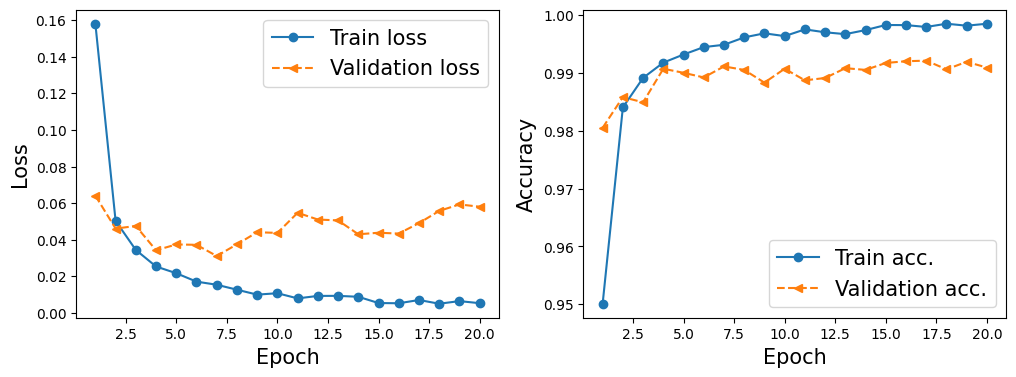

In [20]:
import matplotlib.pyplot as plt


x_arr = np.arange(len(hist[0])) + 1  # number of epochs

fig = plt.figure(figsize=(12, 4))

ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)

plt.show()

In [46]:
# cuda.synchronize()
# It is used to synchronize all CUDA operations.
# When you are running PyTorch on a GPU, operations are often asynchronous for efficiency.
# It ensures that all preceding CUDA operations are finished before moving on, important before switching from GPU to CPU.

torch.cuda.synchronize()

# moves the model from the GPU to the CPU.
model_cpu = model.cpu()


#pred = model(mnist_test_dataset.data.unsqueeze(1).float()) #.unsqueeze(1)/ 255.
pred = model(mnist_test_dataset.data.unsqueeze(1)/255.)

is_correct = (torch.argmax(pred, dim=1) == mnist_test_dataset.targets).float()
print(f'Test accuracy: {is_correct.mean():.4f}')


Test accuracy: 0.9926


In [50]:
print(mnist_test_dataset.data.shape)
print(mnist_test_dataset.data.unsqueeze(1).shape)
#mnist_test_dataset.data[0]

torch.Size([10000, 28, 28])
torch.Size([10000, 1, 28, 28])


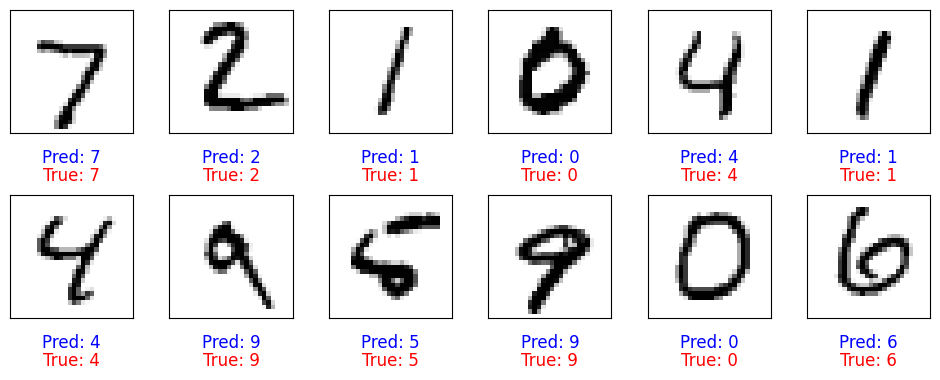

In [72]:
fig = plt.figure(figsize=(12, 4))
for i in range(12):
    ax = fig.add_subplot(2, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    img, true_label = mnist_test_dataset[i]
    img = img[0, :, :]  # Get the 2D image data from the tensor
    #img = mnist_test_dataset[i][0][0, :, :]   # mnist_test_dataset[i] contain image (tensor) and target (int)
    pred = model(img.unsqueeze(0).unsqueeze(1)) # unsqueeze adds a new dimension to a tensor at a specified position

    y_pred = torch.argmax(pred)
    ax.imshow(img, cmap='gray_r')

    # Add both predicted and ground truth labels to the plot
    ax.text(0.5, -0.2, f'Pred: {y_pred.item()}', size=12, color='blue',
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.text(0.5, -0.35, f'True: {true_label}', size=12, color='red',
            horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

# Adjust vertical spacing between rows (increase hspace)
plt.subplots_adjust(hspace=0.5)  # Increase space between rows (default is 0.2)


plt.show()

### Randomly select an image, rotate, and make prediction

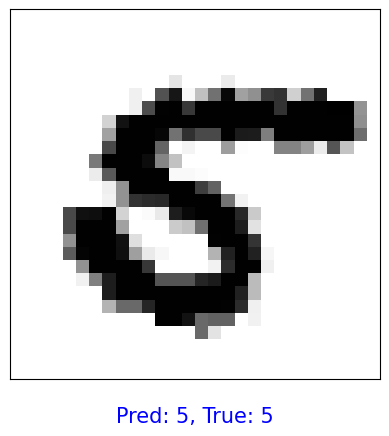

angle: -15.84


In [144]:
import random
import torchvision.transforms.functional as TF

# Randomly select an image from the MNIST test dataset
random_idx = random.randint(0, len(mnist_test_dataset) - 1)  # Select a random index
img, true_label = mnist_test_dataset[random_idx]  # Get the image and true label
img = img.unsqueeze(0)  # Add batch dimension [1, 1, 28, 28]

# Rotate the image by a random angle
angle = random.uniform(-45, 45)  # Choose a random angle between -90 and 90 degrees
rotated_img = TF.rotate(img, angle)  # Rotate the image

# Make a prediction with the rotated image
pred = model(rotated_img)  # Run through the model
y_pred = torch.argmax(pred)  # Get the predicted label

# Plot the rotated image and show both the prediction and the true label
fig, ax = plt.subplots()
ax.set_xticks([]); ax.set_yticks([])

# Display the rotated image
ax.imshow(rotated_img.squeeze(), cmap='gray_r')

# Show predicted and true labels
ax.text(0.5, -0.1, f'Pred: {y_pred.item()}, True: {true_label}', size=15, color='blue',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.show()

print(f"angle: {angle:1.2f}")

### Add an extra convolutional layer

Can you add to the prior model, before flattening, an extra convolutional layer 5x5x128? Please adjust the two FC layers to match the new dimensions.